In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

np.random.seed(1)

n = 1000

x1_zeros = np.random.normal(2, 0.5, n)
x2_zeros = np.random.normal(2, 0.5, n)

x1_ones = np.random.normal(5, 1, n)
x2_ones = np.random.normal(5, 1, n)

x1 = list(x1_zeros) + list(x1_ones)
x2 = list(x2_zeros) + list(x2_ones)
y = [0 for _ in range(n)] + [1 for _ in range(n)]

dataset = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y': y,
})

print(dataset.head(20))

          x1        x2  y
0   2.812173  1.923382  0
1   1.694122  0.783746  0
2   1.735914  2.253992  0
3   1.463516  1.837984  0
4   2.432704  1.244462  0
5   0.849231  1.564289  0
6   2.872406  1.567585  0
7   1.619397  2.304375  0
8   2.159520  2.280819  0
9   1.875315  2.757375  0
10  2.731054  2.323962  0
11  0.969930  1.324175  0
12  1.838791  1.295395  0
13  1.807973  2.565363  0
14  2.566885  2.783343  0
15  1.450054  1.881126  0
16  1.913786  2.279401  0
17  1.561071  1.247554  0
18  2.021107  1.028039  0
19  2.291408  1.412988  0


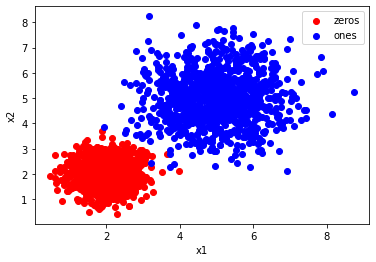

In [2]:
plt.scatter(x1_zeros, x2_zeros, label='zeros', c = 'r')
plt.scatter(x1_ones, x2_ones, label = 'ones', c = 'b')
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X = dataset[['x1','x2']]
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, train_size=0.8, shuffle=True)

model = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2, random_state=0)
model = model.fit(X_train, y_train)

print(X_test)
print(model.apply(X_test))
# print(model.predict_proba(X_test))
print(f'Parameters: {model.get_params()}')
print(f'Number of leaves: {model.get_n_leaves()}')
print(f'Depth: {model.get_depth()}')
print(f'Score: {model.score(X_test, y_test)}')

tree.export_graphviz(model, out_file='tree.dot', feature_names=X.columns, class_names=['Zero','One'])
tree.plot_tree(model, feature_names=X.columns, rounded=True, filled=True, class_names=['Zero', 'One'])


            x1        x2
405   2.043232  2.041694
1190  4.248969  4.813748
1132  5.919447  2.260858
731   2.362958  2.520720
1754  4.449124  5.093413
...        ...       ...
638   1.542104  1.796965
360   1.721253  2.238651
1810  6.077520  5.739115
1743  5.353133  5.207295
563   2.274065  1.789452

[400 rows x 2 columns]
[ 3 14  9  3 14 14 14 14 14  3 14 14  3  3  3 14  3 14  9 14 14 14  3 14
 14 14  3 14  3 14 14 14 14 14 14  3 14  3  3  3  3 14 14  3 14  3  3  3
 14 14 14 14  3  3  3  3  3 14 14 14  3 14 14 14  3  3  3 14  3  3  3  3
 12 14  3 14  3  3 14 14  3  3  3 14 14  3 14  3  3  3  3 14  3 13 14 14
 14  3 14  3 14 14  3 14  3  3 14 14 14  3  3 14  3 14 14  3  9  3  3  3
  3  3 14  3 14 14  3 14  3 14  3  3  3  3 14  3  3 14  3  3 14  3 14  3
  3  3  3  3 14 14  3 14  3 14  3  3  3  3  3 14 14 14 14 14 14  3 14  9
  3 14  3 14  3  3  3 14  3  3 14  3 14 14 14  3 14 14 14  3 12 14 14  3
  3  3  3 14 14  3 14 14 14  3  3  3 14 14 14 14  3 14  3  3  3 14  3  3
 14  3 14  3  3  3 

[Text(193.15384615384616, 195.696, 'x2 <= 3.119\ngini = 0.5\nsamples = 1600\nvalue = [800, 800]\nclass = Zero'),
 Text(103.01538461538462, 152.208, 'x1 <= 3.697\ngini = 0.048\nsamples = 813\nvalue = [793, 20]\nclass = Zero'),
 Text(51.50769230769231, 108.72, 'x1 <= 3.219\ngini = 0.003\nsamples = 793\nvalue = [792, 1]\nclass = Zero'),
 Text(25.753846153846155, 65.232, 'gini = 0.0\nsamples = 787\nvalue = [787, 0]\nclass = Zero'),
 Text(77.26153846153846, 65.232, 'x1 <= 3.224\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = Zero'),
 Text(51.50769230769231, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = One'),
 Text(103.01538461538462, 21.744, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Zero'),
 Text(154.52307692307693, 108.72, 'x2 <= 2.116\ngini = 0.095\nsamples = 20\nvalue = [1, 19]\nclass = One'),
 Text(128.76923076923077, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Zero'),
 Text(180.27692307692308, 65.232, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]\ncl